In [1]:
import pandas as pd
import pandas_profiling 
import numpy as np
from scipy.stats import boxcox
from scipy.special import boxcox1p

# Read in Data

In [2]:
df=pd.read_csv(r"C:\Users\Mahar\Documents\Delta Technical Interview\Data\postpaid_datamart.csv")

#### View a sample of the data

In [3]:
df.head(5)

Unnamed: 0  OG_INTL_FREE_CALL_MOU  OG_ONN_FREE_CALL_MOU  FREE_GPRS_MB  \
0      803985                    NaN                   NaN     29918.731   
1      431536                    NaN                   NaN         0.013   
2       59287                    NaN                   NaN     14688.529   
3       19045                    NaN                   NaN         0.000   
4      453323                   1.15              1566.617      8537.953   

   TOTAL_REVENUE  TOTAL_REVENUE_VAS  ROAMING_REV  F_CHURN_3M    MONTH  
0          18.00               9.00          0.0           1  october  
1           9.76               4.88          0.0           1  october  
2          36.00              18.00          0.0           1  october  
3          24.00              12.00          0.0           1  october  
4          68.62              34.31          0.0           1  october

In [4]:
df.columns = ['Customer_ID', 'OG_INTL_FREE_CALL_MOU', 'OG_ONN_FREE_CALL_MOU',
       'FREE_GPRS_MB', 'TOTAL_REVENUE', 'TOTAL_REVENUE_VAS', 'ROAMING_REV',
       'F_CHURN_3M', 'MONTH']


#### All columns and names

In [5]:
all_columns = list(df)
count_columns= len(all_columns)

In [6]:
all_columns

['Customer_ID',
 'OG_INTL_FREE_CALL_MOU',
 'OG_ONN_FREE_CALL_MOU',
 'FREE_GPRS_MB',
 'TOTAL_REVENUE',
 'TOTAL_REVENUE_VAS',
 'ROAMING_REV',
 'F_CHURN_3M',
 'MONTH']

#### Check which columns are numeric

In [7]:
numeric_columns= df._get_numeric_data().columns
count_numeric_cols=len(numeric_columns )

#### Categorical columns

In [8]:
categorical_columns = [ i for i in all_columns if i not in numeric_columns]

# Data Quality tests

In [218]:
profile_df = pandas_profiling.ProfileReport(df)

##traindemographics
print('Running EDA for data')
try:
    df_rejected_variables = profile_traindemographics.get_rejected_variables(threshold =0.9)
except: 
    print('Exception occurred')
    


Running EDA for data
Exception occurred


In [219]:
pandas_profiling.ProfileReport(df)

In [9]:
#csv report of Data quality 
dq_1=df.describe(include='all').T
dq_1['% missing']=df.isna().sum()/len(df)
dq_1['num missing']=df.isna().sum()
dq_1['mode']=df.mode().T[0]

a=[]
for i in df.columns:
    #print(i)
    #print(pd.DataFrame(df.groupby([i])[i].count().T))
    try:
        a.append(pd.DataFrame(df.groupby([i])[i].count().T).T[str(dq_1['mode'][i])][0])
    except:
        a.append(pd.DataFrame(df.groupby([i])[i].count().T).T[dq_1['mode'][i]][0])
        
dq_1['mode_freq']=pd.DataFrame(a)
az=pd.DataFrame(a)
az.index=dq_1.index
dq_1['mode_freq']=pd.DataFrame(az)

dq_1.to_csv(r"C:\Users\Mahar\Documents\Delta Technical Interview\Documentation\Handover doc\DQ Report\dq_report.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Mahar\\Documents\\Delta Technical Interview\\Documentation\\Handover doc\\DQ Report\\dq_report.csv'

#### Distributions for each variable

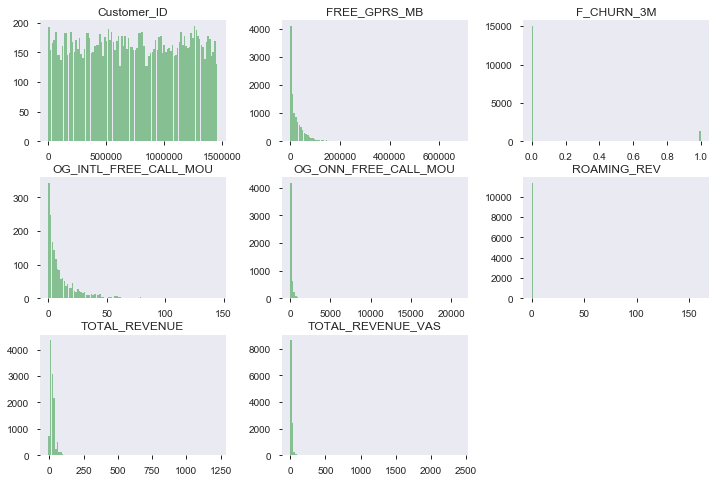

In [10]:
%matplotlib inline
ax = df.hist(column=all_columns, bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

#### Data consistency checks 

In [11]:
list(df)

['Customer_ID',
 'OG_INTL_FREE_CALL_MOU',
 'OG_ONN_FREE_CALL_MOU',
 'FREE_GPRS_MB',
 'TOTAL_REVENUE',
 'TOTAL_REVENUE_VAS',
 'ROAMING_REV',
 'F_CHURN_3M',
 'MONTH']

#### impute missing values 

In [12]:

#create indicators for checking if the field was null, set to 0 by default , will be updated later
df['OG_INTL_FREE_CALL_MOU_ind']=0
df['OG_ONN_FREE_CALL_MOU_ind']=0
df['FREE_GPRS_MB_ind']=0
df['TOTAL_REVENUE_ind']=0
df['TOTAL_REVENUE_VAS_ind']=0
df['ROAMING_REV_ind']=0

#updates the indicator if the value was null, and imputes the values

df['OG_INTL_FREE_CALL_MOU_ind'][pd.isna(df['OG_INTL_FREE_CALL_MOU'])]=1
df['OG_INTL_FREE_CALL_MOU']=df['OG_INTL_FREE_CALL_MOU'].fillna(0)

df['OG_ONN_FREE_CALL_MOU_ind'][pd.isna(df['OG_ONN_FREE_CALL_MOU'])]=1
df['OG_ONN_FREE_CALL_MOU']=df['OG_ONN_FREE_CALL_MOU'].fillna(0)

df['FREE_GPRS_MB_ind'][pd.isna(df['FREE_GPRS_MB'])]=1
df['FREE_GPRS_MB']=df['FREE_GPRS_MB'].fillna(0)

df['TOTAL_REVENUE_ind'][pd.isna(df['TOTAL_REVENUE'])]=1
df['TOTAL_REVENUE']=df['TOTAL_REVENUE'].fillna(0)

df['TOTAL_REVENUE_VAS_ind'][pd.isna(df['TOTAL_REVENUE_VAS'])]=1
df['TOTAL_REVENUE_VAS']=df['TOTAL_REVENUE_VAS'].fillna(0)

df['ROAMING_REV_ind'][pd.isna(df['ROAMING_REV'])]=1
df['ROAMING_REV']=df['ROAMING_REV'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [13]:
# checks to see which records do not meet the expected ranges of the data, consistent with the definitions
fields=['OG_INTL_FREE_CALL_MOU',
 'OG_ONN_FREE_CALL_MOU',
 'FREE_GPRS_MB',
 'TOTAL_REVENUE',
 'TOTAL_REVENUE_VAS',
 'ROAMING_REV',
 'F_CHURN_3M',]

for i in fields:
    if len(df[df[i] < 0])>0:
        print(i + ' has invalid outliers')

df['FREE_GPRS_MB'][df['FREE_GPRS_MB'] < 0]=0
df['OG_INTL_FREE_CALL_MOU'][df['OG_INTL_FREE_CALL_MOU'] < 0]=0
df['OG_ONN_FREE_CALL_MOU'][df['OG_ONN_FREE_CALL_MOU'] < 0]=0
df['TOTAL_REVENUE'][df['TOTAL_REVENUE'] < 0]=0
df['TOTAL_REVENUE_VAS'] [df['TOTAL_REVENUE_VAS'] < 0]=0
df['ROAMING_REV'][df['ROAMING_REV'] < 0]=0
df['F_CHURN_3M'][(df['F_CHURN_3M'] != 0) & (df['F_CHURN_3M'] != 1)]=0

FREE_GPRS_MB has invalid outliers
TOTAL_REVENUE has invalid outliers
TOTAL_REVENUE_VAS has invalid outliers


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [14]:


#transform the data using box cox transforms

df["bc_FREE_GPRS_MB"] =boxcox1p(df["FREE_GPRS_MB"],0)
df["bc_OG_INTL_FREE_CALL_MOU"] =boxcox1p(df["OG_INTL_FREE_CALL_MOU"],0)
df["bc_OG_ONN_FREE_CALL_MOU"] =boxcox1p(df["OG_ONN_FREE_CALL_MOU"],0)
df["bc_TOTAL_REVENUE"] =boxcox1p(df["TOTAL_REVENUE"],0)
df["bc_TOTAL_REVENUE_VAS"] =boxcox1p(df["TOTAL_REVENUE_VAS"],0)
df["bc_ROAMING_REV"] =boxcox1p(df["ROAMING_REV"],0)
# df["bc_F_CHURN_3M"] =boxcox1p(df["TOTAL_REVENUE"],0)


In [15]:
#Function for finding outliers from a normal distribution
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range


In [16]:
#box cox transformed features outlier detection
box_cox_transformed_data = ['bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_TOTAL_REVENUE_VAS',
 'bc_ROAMING_REV']
for i in box_cox_transformed_data:
    limits=outlier_treatment(df[i])
#     print(limits)
    
    if len(df[(df[i] < limits[0])|(df[i] > limits[1])])>0:
        print(i + ' has ' +str(len(df[(df[i] < limits[0])|(df[i] > limits[1])])) +' outliers')
    

bc_OG_INTL_FREE_CALL_MOU has 1835 outliers
bc_OG_ONN_FREE_CALL_MOU has 125 outliers
bc_TOTAL_REVENUE_VAS has 1 outliers
bc_ROAMING_REV has 294 outliers


In [17]:
mode_replace_list = ['bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE_VAS']

for i in mode_replace_list:
    limits=outlier_treatment(df[i])
    df[i][(df[i] < limits[0])|(df[i] > limits[1])]= df[i].mode()
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


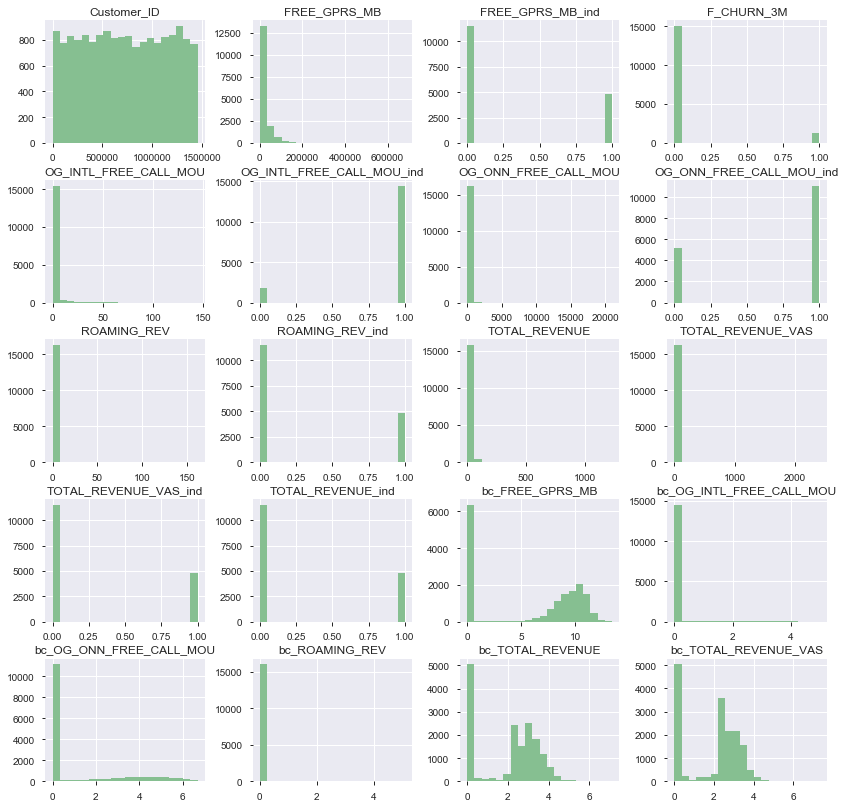

In [18]:
#Histograms of the distributions after imputation and transformation
ax = df.hist(column=list(df), bins=20, grid=True, figsize=(14,14), color='#86bf91', zorder=2, rwidth=1)

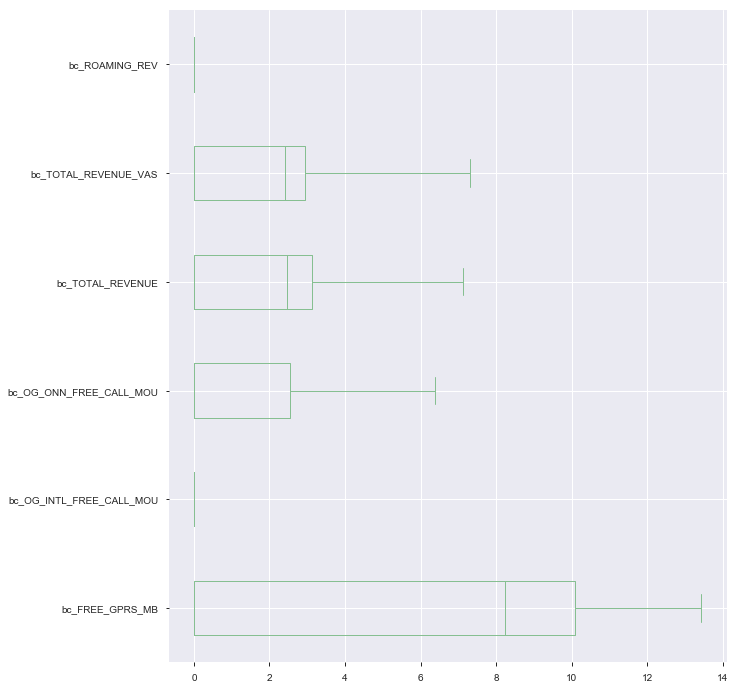

In [19]:
#box plots
%matplotlib inline
df[[ 
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_TOTAL_REVENUE_VAS',
 'bc_ROAMING_REV']].plot.box( vert =False, grid=True, figsize=(10,12), color='#86bf91', zorder=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\Mahar\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\Mahar\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

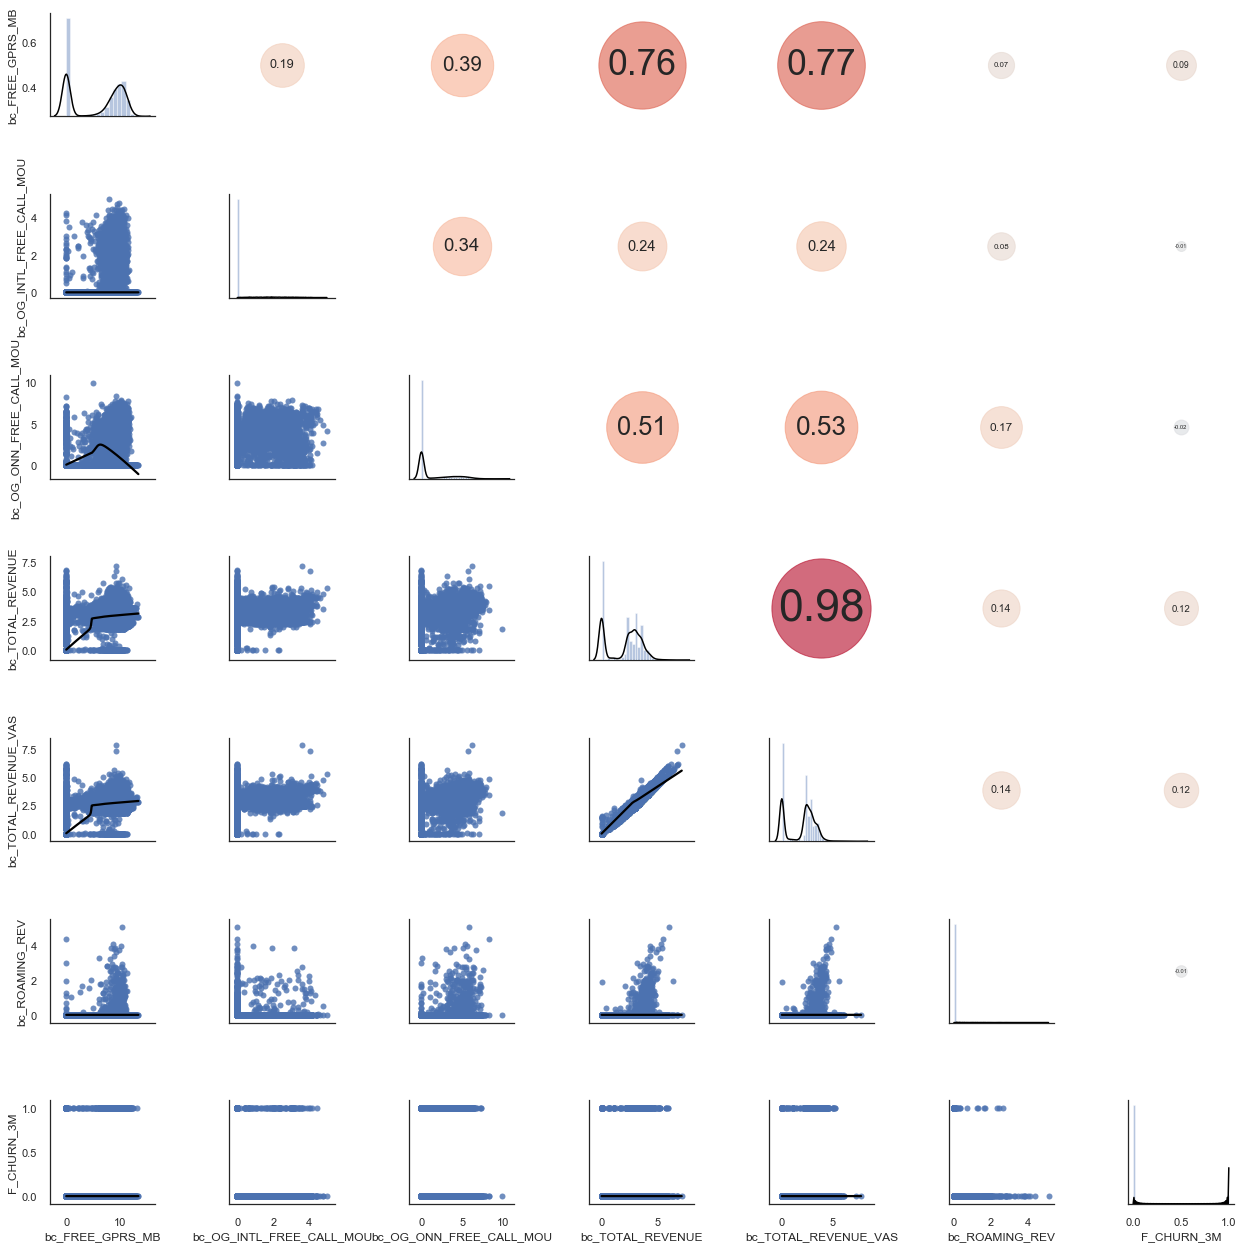

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white')

g = sns.PairGrid(df[[ 
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_TOTAL_REVENUE_VAS',
 'bc_ROAMING_REV','F_CHURN_3M']], diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

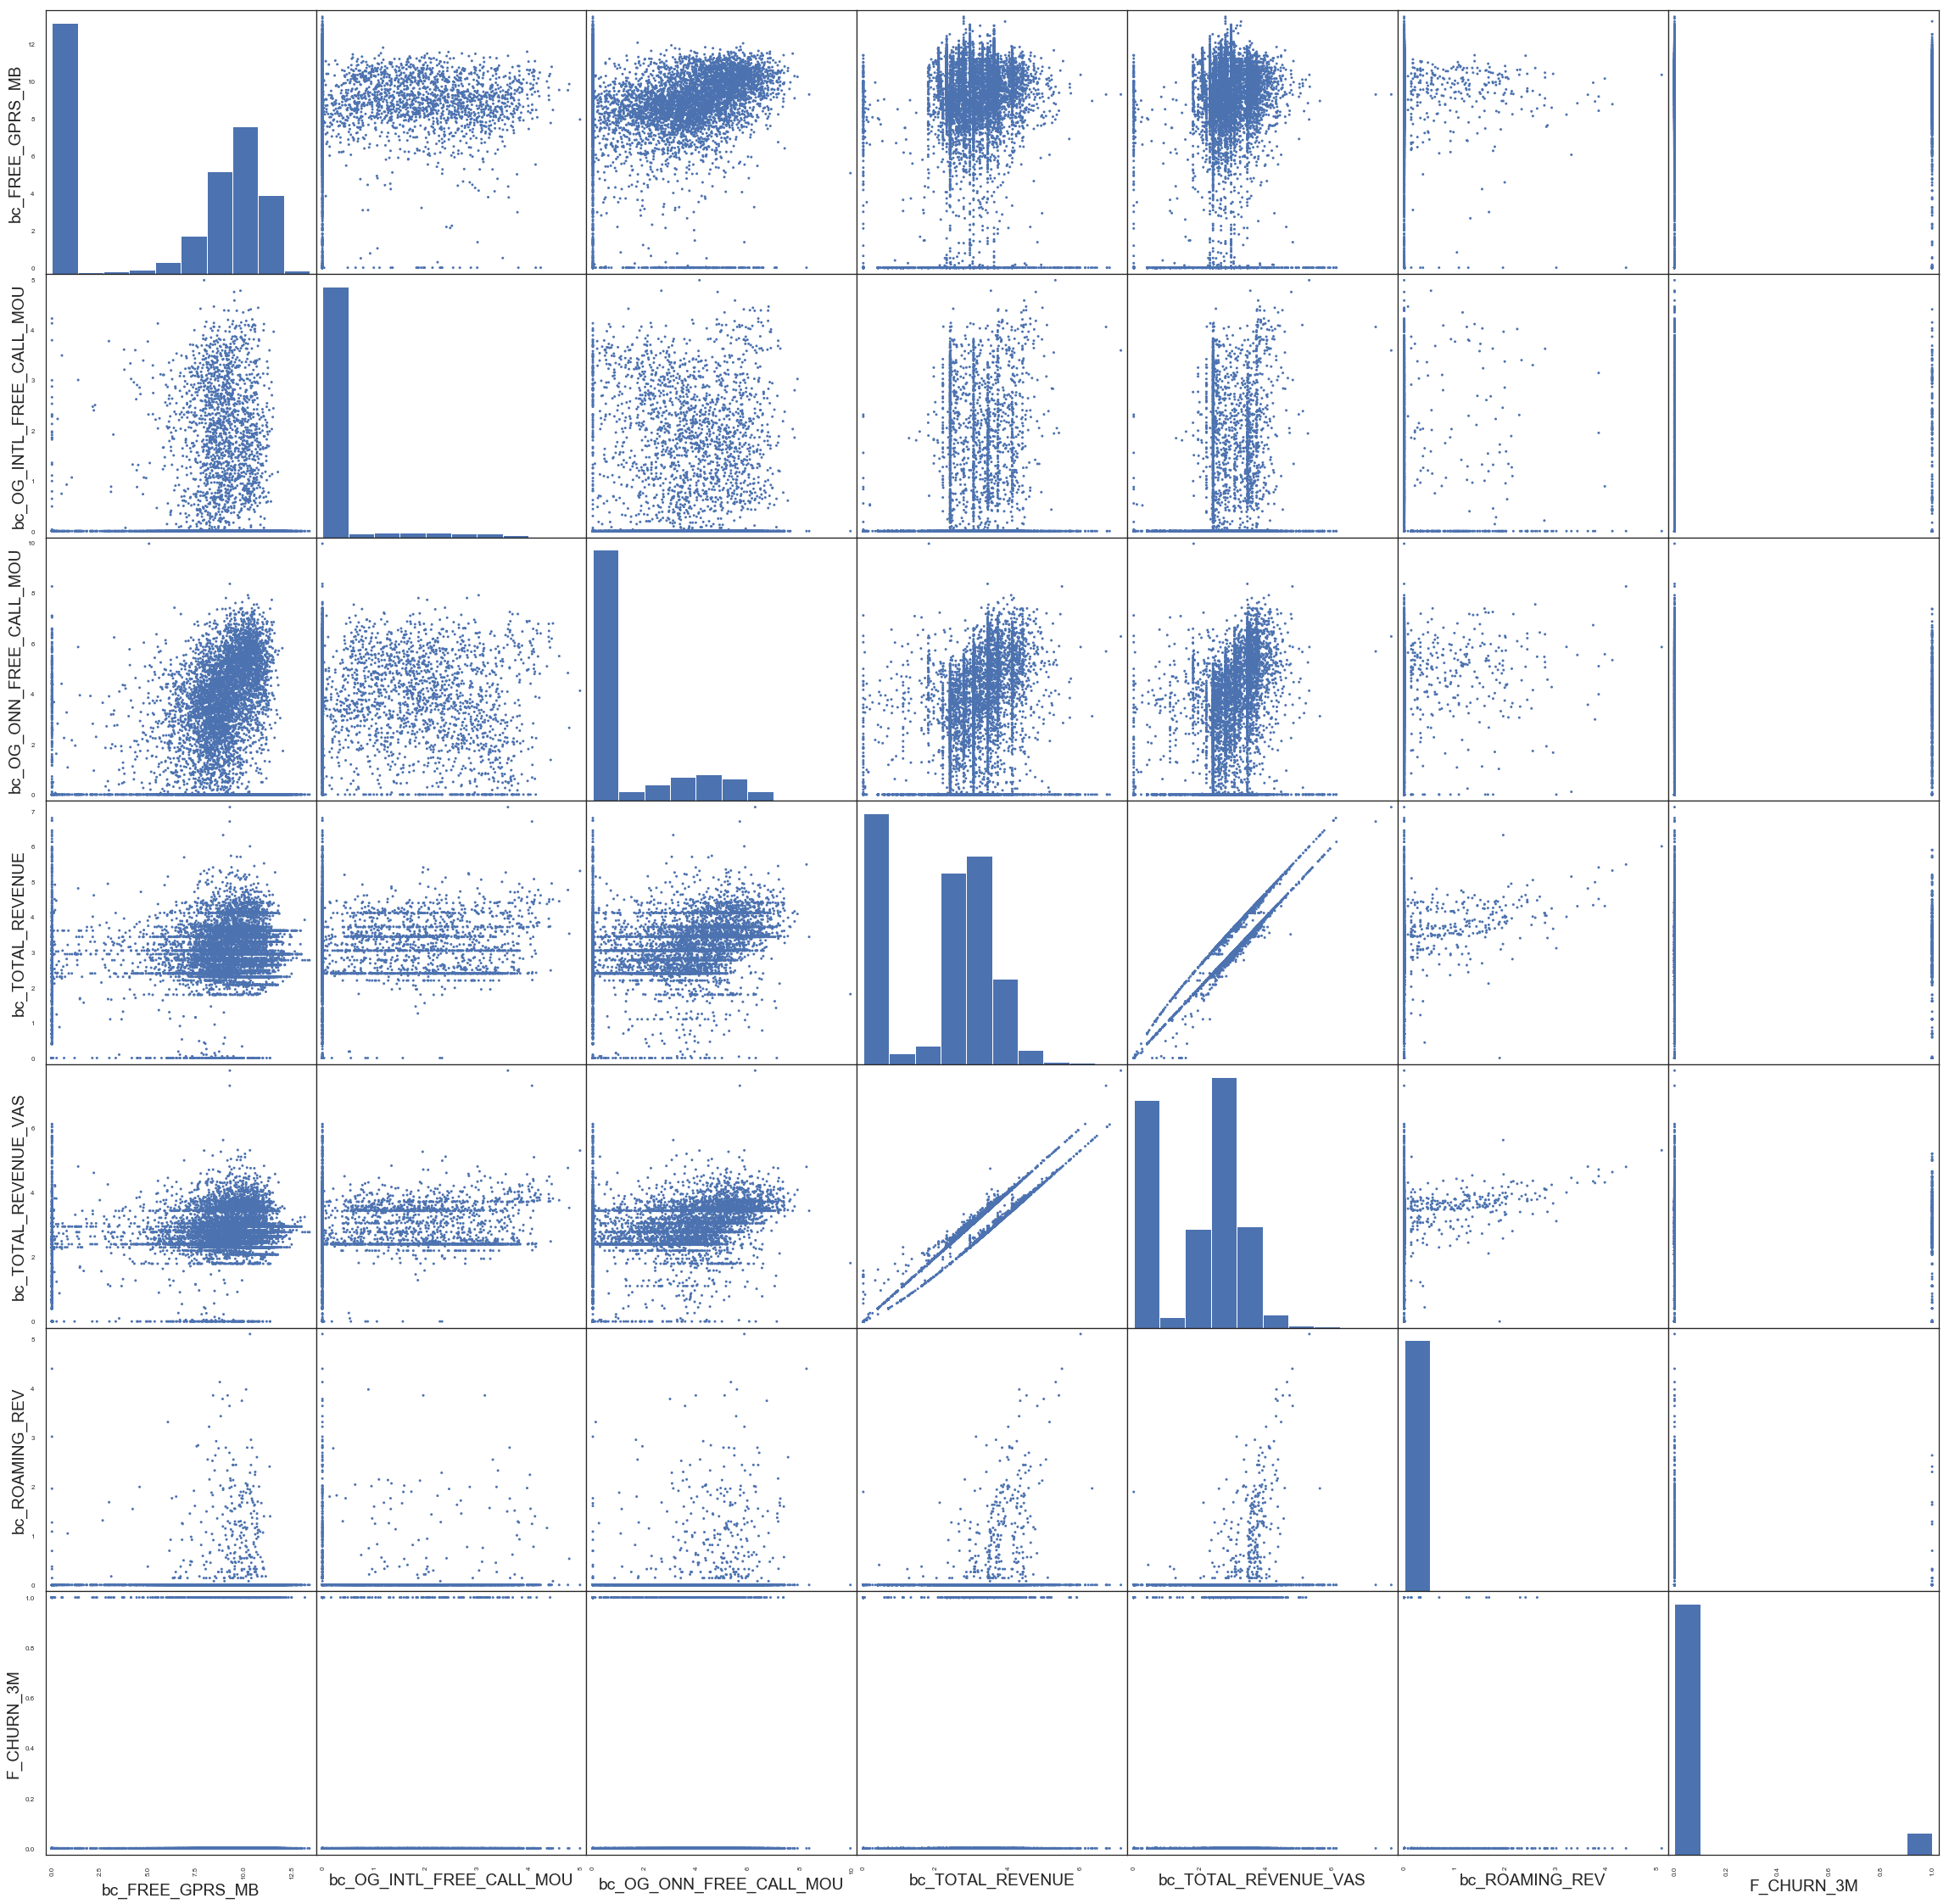

In [52]:
%matplotlib inline
from  pandas.plotting import scatter_matrix
axs = scatter_matrix(df[[ 
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_TOTAL_REVENUE_VAS',
 'bc_ROAMING_REV','F_CHURN_3M','MONTH']], alpha=1, diagonal='hist',figsize=(40,40))

In [66]:
df.to_csv(r"C:\Users\Mahar\Desktop\data_clean.csv")

In [20]:
# encode the month 
Dummy_Cat_vars=['MONTH']
for i in Dummy_Cat_vars:
    df[i]=df[i].astype('category')
    df[i]=df[i].cat.codes

In [21]:
df.columns[df.isnull().any()]
df['bc_TOTAL_REVENUE_VAS'][pd.isna(df['bc_TOTAL_REVENUE_VAS'])]=0
df['bc_OG_ONN_FREE_CALL_MOU'][pd.isna(df['bc_OG_ONN_FREE_CALL_MOU'])]=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Scale data

In [22]:
y = df.pop('F_CHURN_3M')

In [111]:
x= df[[ 'OG_INTL_FREE_CALL_MOU_ind',
 'OG_ONN_FREE_CALL_MOU_ind',
 'FREE_GPRS_MB_ind',
 'TOTAL_REVENUE_ind',
 'TOTAL_REVENUE_VAS_ind',
 'ROAMING_REV_ind',
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_ROAMING_REV','MONTH']].values

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
normalised_data = scaler.fit_transform(df)

In [120]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test =train_test_split(x,y,test_size=0.9)

In [121]:
len(X_train)

1629

In [122]:
from imblearn.combine import SMOTETomek
smt= SMOTETomek(random_state=42)
X_smt,y_smt = smt.fit_resample(X_train,y_train)

In [123]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression(random_state =0)
LR_classifier.fit(X_smt,y_smt)
LR_classifier_pred = LR_classifier.predict(X_test)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,LR_classifier_pred))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72     13501
           1       0.13      0.70      0.21      1165

    accuracy                           0.59     14666
   macro avg       0.54      0.64      0.47     14666
weighted avg       0.89      0.59      0.68     14666



Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.


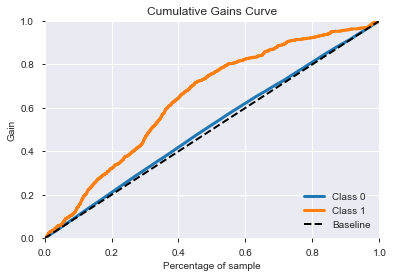

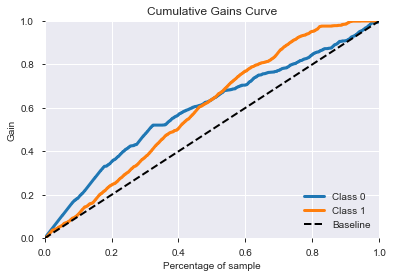

In [125]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test.values,LR_classifier.predict_proba(X_test))
skplt.metrics.plot_cumulative_gain(y_smt.values,LR_classifier.predict_proba(X_smt))

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


F1-Score: 0.5923905632074186
F1-Score: 0.6450354609929078


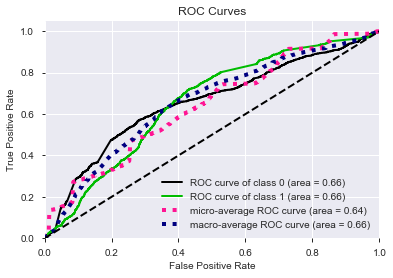

In [126]:
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_curve,auc
from scikitplot.metrics import plot_roc_curve
plot_roc_curve(y_test.values,LR_classifier.predict_proba(X_test))


print("F1-Score: " +str(f1_score(y_test.values,LR_classifier.predict(X_test), average='micro')))
print("F1-Score: " +str(f1_score(y_smt.values,LR_classifier.predict(X_smt), average='micro')))



In [127]:
import shap 

In [132]:
explainer = shap.Explainer(LR_classifier, X_train, feature_names=[ 'OG_INTL_FREE_CALL_MOU_ind',
 'OG_ONN_FREE_CALL_MOU_ind',
 'FREE_GPRS_MB_ind',
 'TOTAL_REVENUE_ind',
 'TOTAL_REVENUE_VAS_ind',
 'ROAMING_REV_ind',
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_ROAMING_REV','MONTH'])
shap_values = explainer(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


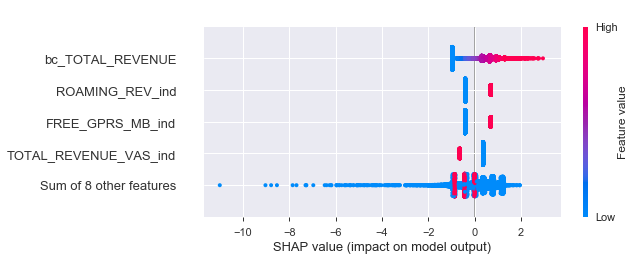

In [133]:
shap.plots.beeswarm(shap_values, max_display=5)

In [75]:
shap.initjs()
ind = 20
shap.plots.force(shap_values[ind])

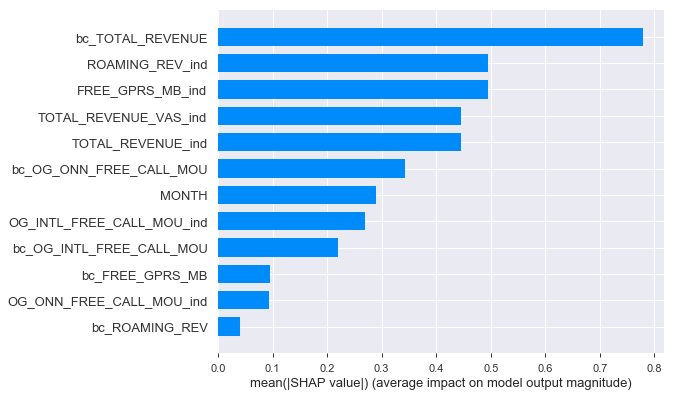

In [134]:
shap.summary_plot(explainer.shap_values(X_test),X_test,plot_type='bar',feature_names=[ 'OG_INTL_FREE_CALL_MOU_ind',
 'OG_ONN_FREE_CALL_MOU_ind',
 'FREE_GPRS_MB_ind',
 'TOTAL_REVENUE_ind',
 'TOTAL_REVENUE_VAS_ind',
 'ROAMING_REV_ind',
 'bc_FREE_GPRS_MB',
 'bc_OG_INTL_FREE_CALL_MOU',
 'bc_OG_ONN_FREE_CALL_MOU',
 'bc_TOTAL_REVENUE',
 'bc_ROAMING_REV','MONTH'])